In [25]:
!nvidia-smi

Sat Jun  1 10:59:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         On | 00000000:68:00.0 Off |                  N/A |
| 32%   42C    P8               19W / 350W|     67MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [39]:
from tqdm import tqdm
import numpy as np
import pandas as pd

# データ読み込みと処理
files = [
    "begin.csv",
    "dialfact.csv",
    "fever.csv",
    "frank.csv",
    "mnbm.csv",
    "paws.csv",
    "q2.csv",
    "qags_cnndm.csv",
    "qags_xsum.csv",
    "summeval.csv",
    "vitc.csv",
]

data = {}
for f in files:
    data[f.split(".")[0]] = pd.read_csv("../data/true/" + f)

# 結果を保存するリスト
result_list = []


# データセットごとに処理
for k, df in tqdm(data.items()):
    # 最初の5つの例を抽出
    for i in range(5):
        inf_summ = df.loc[i, "generated_text"]
        convo = df.loc[i, "grounding"]
        label = df.loc[i, "label"]

        
        # 結果をリストに追加
        result_list.append({
            "Dataset": k,
            "Example": i+1,
            "Conversation": convo,
            "Inference Summary": inf_summ,
            "Label": label
        })

# 結果をDataFrameに変換
results_df = pd.DataFrame(result_list)

# DataFrameをNotebookで表示
pd.set_option('display.max_colwidth', None)
results_df


100%|██████████| 11/11 [00:00<00:00, 1804.99it/s]


,Dataset,Example,Conversation,Inference Summary,Label
0,begin,1,early skiers used one long pole or spear.,"it is a long pole, or spear",1
1,begin,2,"every country aims to provide basic education, but the systems and terminology remain unique to them.",most countries aim to provide basic education.,1
2,begin,3,"although modern skiing has evolved from beginnings in scandinavia, it may have been practiced more than 100 centuries ago in what is now china, according to an interpretation of ancient paintings.","yeah, it can be scary",0
3,begin,4,"although modern skiing has evolved from beginnings in scandinavia, it may have been practiced more than 100 centuries ago in what is now china, according to an interpretation of ancient paintings.","it has evolved from beginnings in scandinavia, but it may have been practiced more than 100 centuries ago in what is now china.",1
4,begin,5,popping of the kernels was achieved by hand on the stovetop through the 19th century.,we know about a few varieties,0
5,dialfact,1,Physical attractiveness is the degree to which a person's physical features are considered aesthetically pleasing or beautiful. This has led to an interrelation of human fitness and attractiveness which has mobilized global fitness and fitness equipment industries.,"Yes, it has, but what i think is just vanity too, thats why fitness just attractiveness",1
6,dialfact,2,Physical attractiveness is the degree to which a person's physical features are considered aesthetically pleasing or beautiful. This has led to an interrelation of human fitness and attractiveness which has mobilized global fitness and fitness equipment industries.,"Yes, it has, but anything you think is just vanity too, connected to fitness and attractiveness",1
7,dialfact,3,Physical attractiveness is the degree to which a person's physical features are considered aesthetically pleasing or beautiful. This has led to an interrelation of human fitness and attractiveness which has mobilized global fitness and fitness equipment industries.,"Yes, it has, but one I think is just vanity too, the physical fitness and attractiveness",1
8,dialfact,4,This has led to an interrelation of human fitness and attractiveness which has mobilized global fitness and fitness equipment industries. Physical attractiveness is the degree to which a person's physical features are considered aesthetically pleasing or beautiful.,"Yes, it has, but some I think is just vanity too, categorized as fitness and attractiveness",1
9,dialfact,5,Evidence suggests that cognitive behavioral therapy and a gradual increase in activity suited to individual capacity can be beneficial in some cases.,It has been suggested that cognitive behavioral therapy and gradual increase in exercise could help in some cases so I'm going to try that for now.,1


In [1]:
!pip3 install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 40.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 25.1 MB/s eta 0:00:00


/tmp/ipykernel_126189/1979464041.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_0, shade=True, color='blue', label='Label 0', ax=ax)
/tmp/ipykernel_126189/1979464041.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_1, shade=True, color='red', label='Label 1', ax=ax)
/tmp/ipykernel_126189/1979464041.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred_0, shade=True, color='blue', label='Label 0', ax=ax)
/tmp/ipykernel_126189/1979464041.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

 

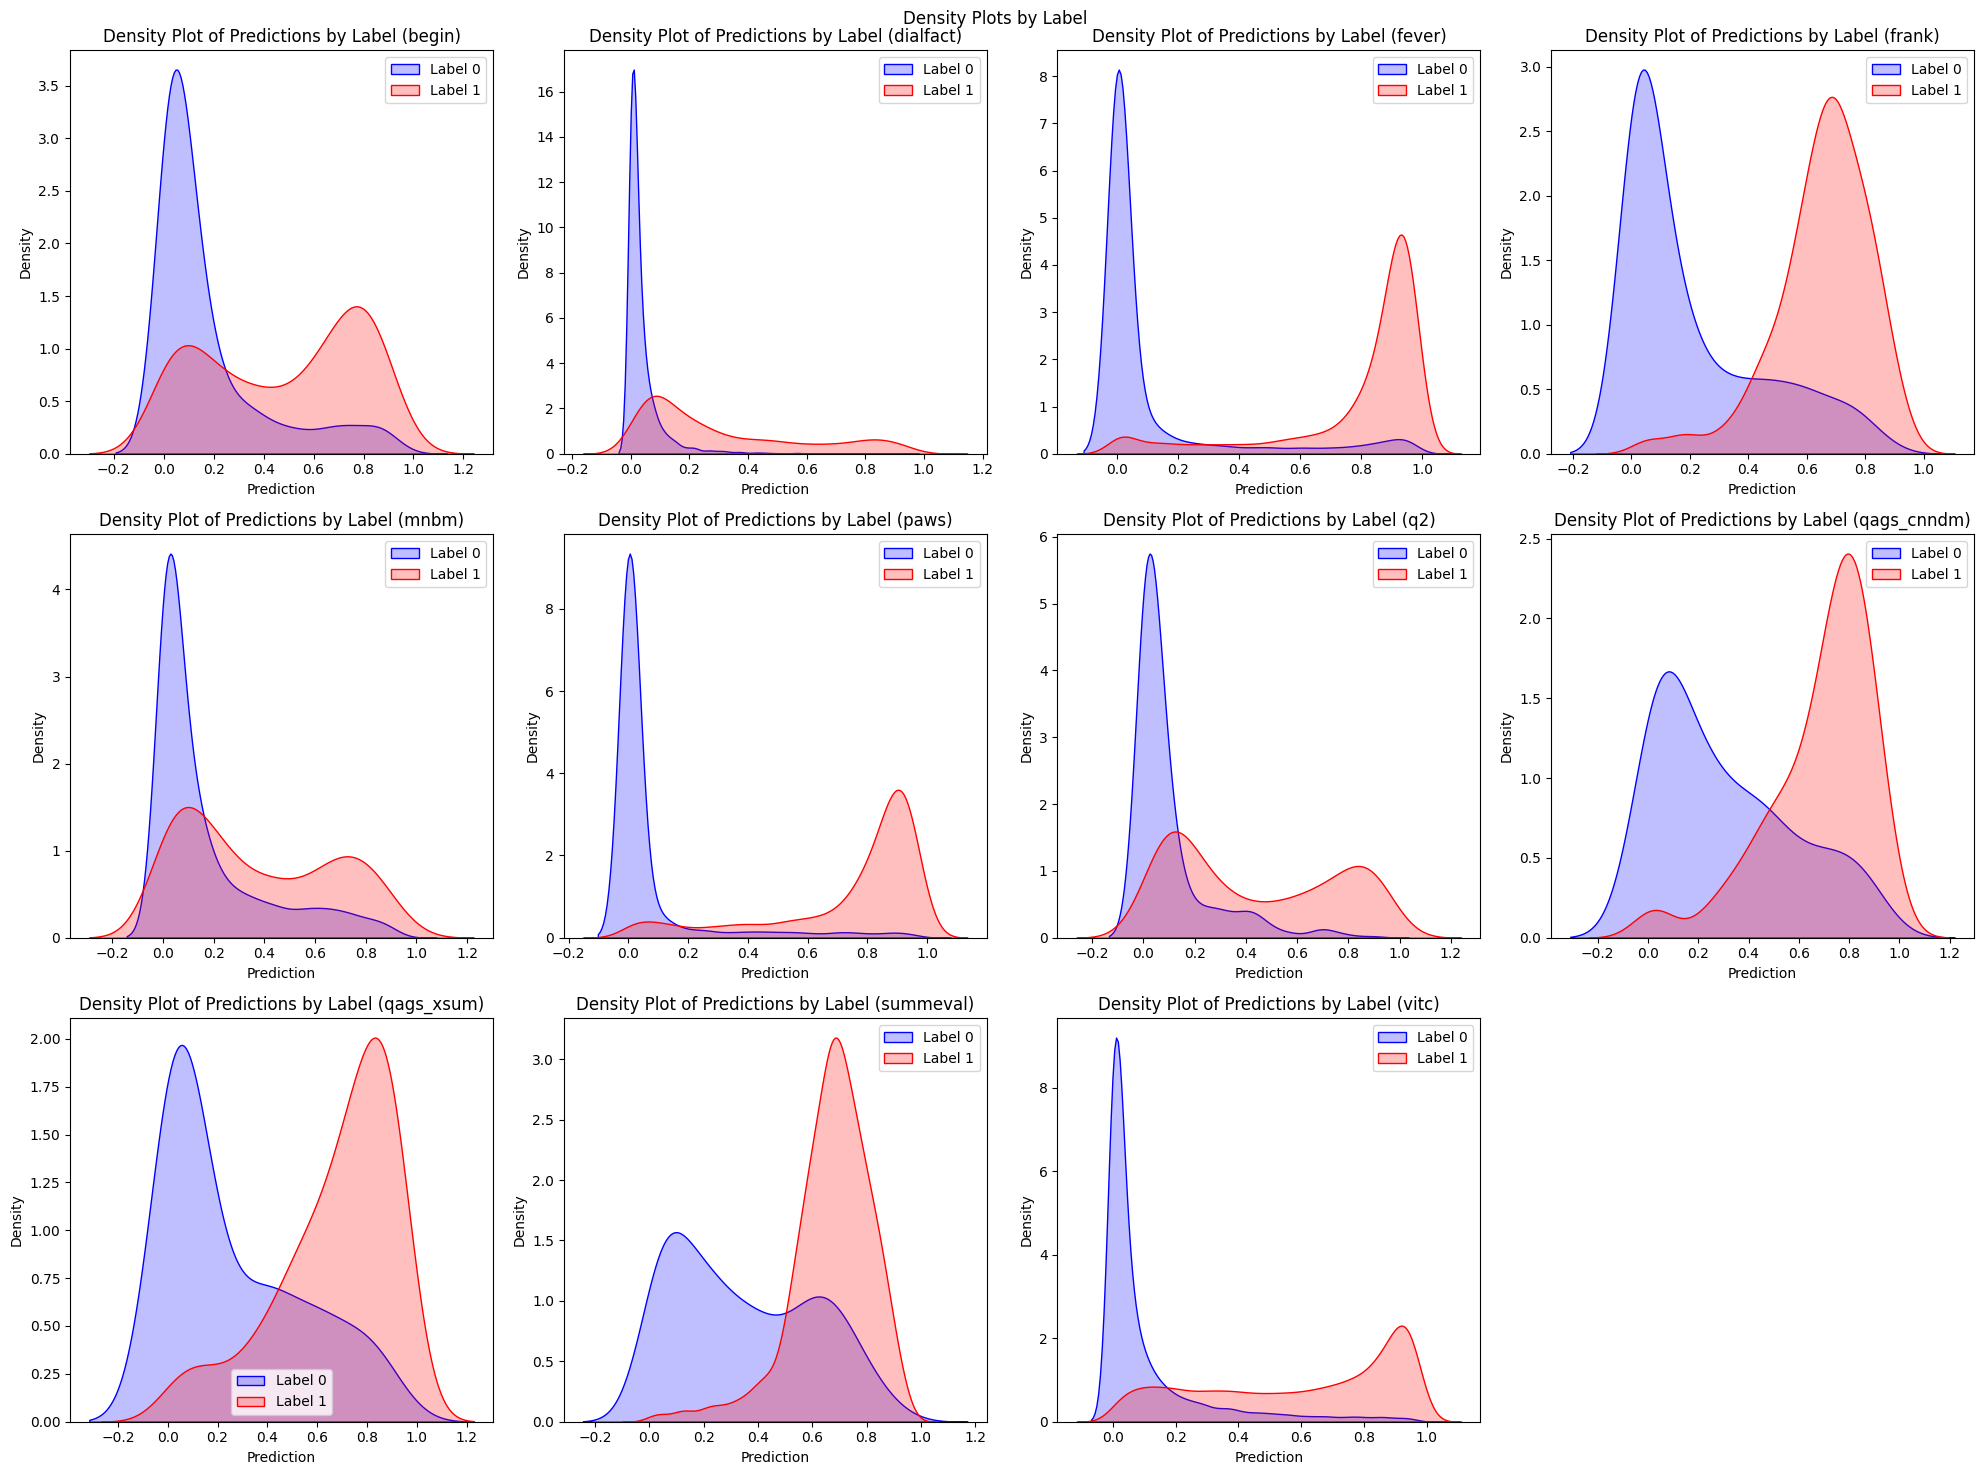

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# データを読み込む
with open("/workspaces/scale-score/experiments/true/results/scale_xl_true_results.json", "r") as f:
    data = json.load(f)

# プロットを作成する関数
def create_density_plot(ax, labels, predictions, title):
    # 0のラベルの予測値と1のラベルの予測値を分ける
    pred_0 = predictions[labels == 0]
    pred_1 = predictions[labels == 1]

    # KDEプロットを作成
    sns.kdeplot(pred_0, shade=True, color='blue', label='Label 0', ax=ax)
    sns.kdeplot(pred_1, shade=True, color='red', label='Label 1', ax=ax)

    # グラフのタイトルとラベル
    ax.set_title(title)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Density')

    # 凡例を表示
    ax.legend()

# プロットの数とレイアウト
num_plots = len(data.keys())
num_rows = 3
num_cols = 4

# プロットのサイズ
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# 各データに対してプロットを作成
for i, (k, v) in enumerate(data.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    labels = np.array(v[1])
    predictions = np.array(v[0])
    create_density_plot(ax, labels, predictions, f'Density Plot of Predictions by Label ({k})')

# 余分なサブプロットを非表示にする
for i in range(num_plots, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# タイトルを設定
plt.suptitle('Density Plots by Label')

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()


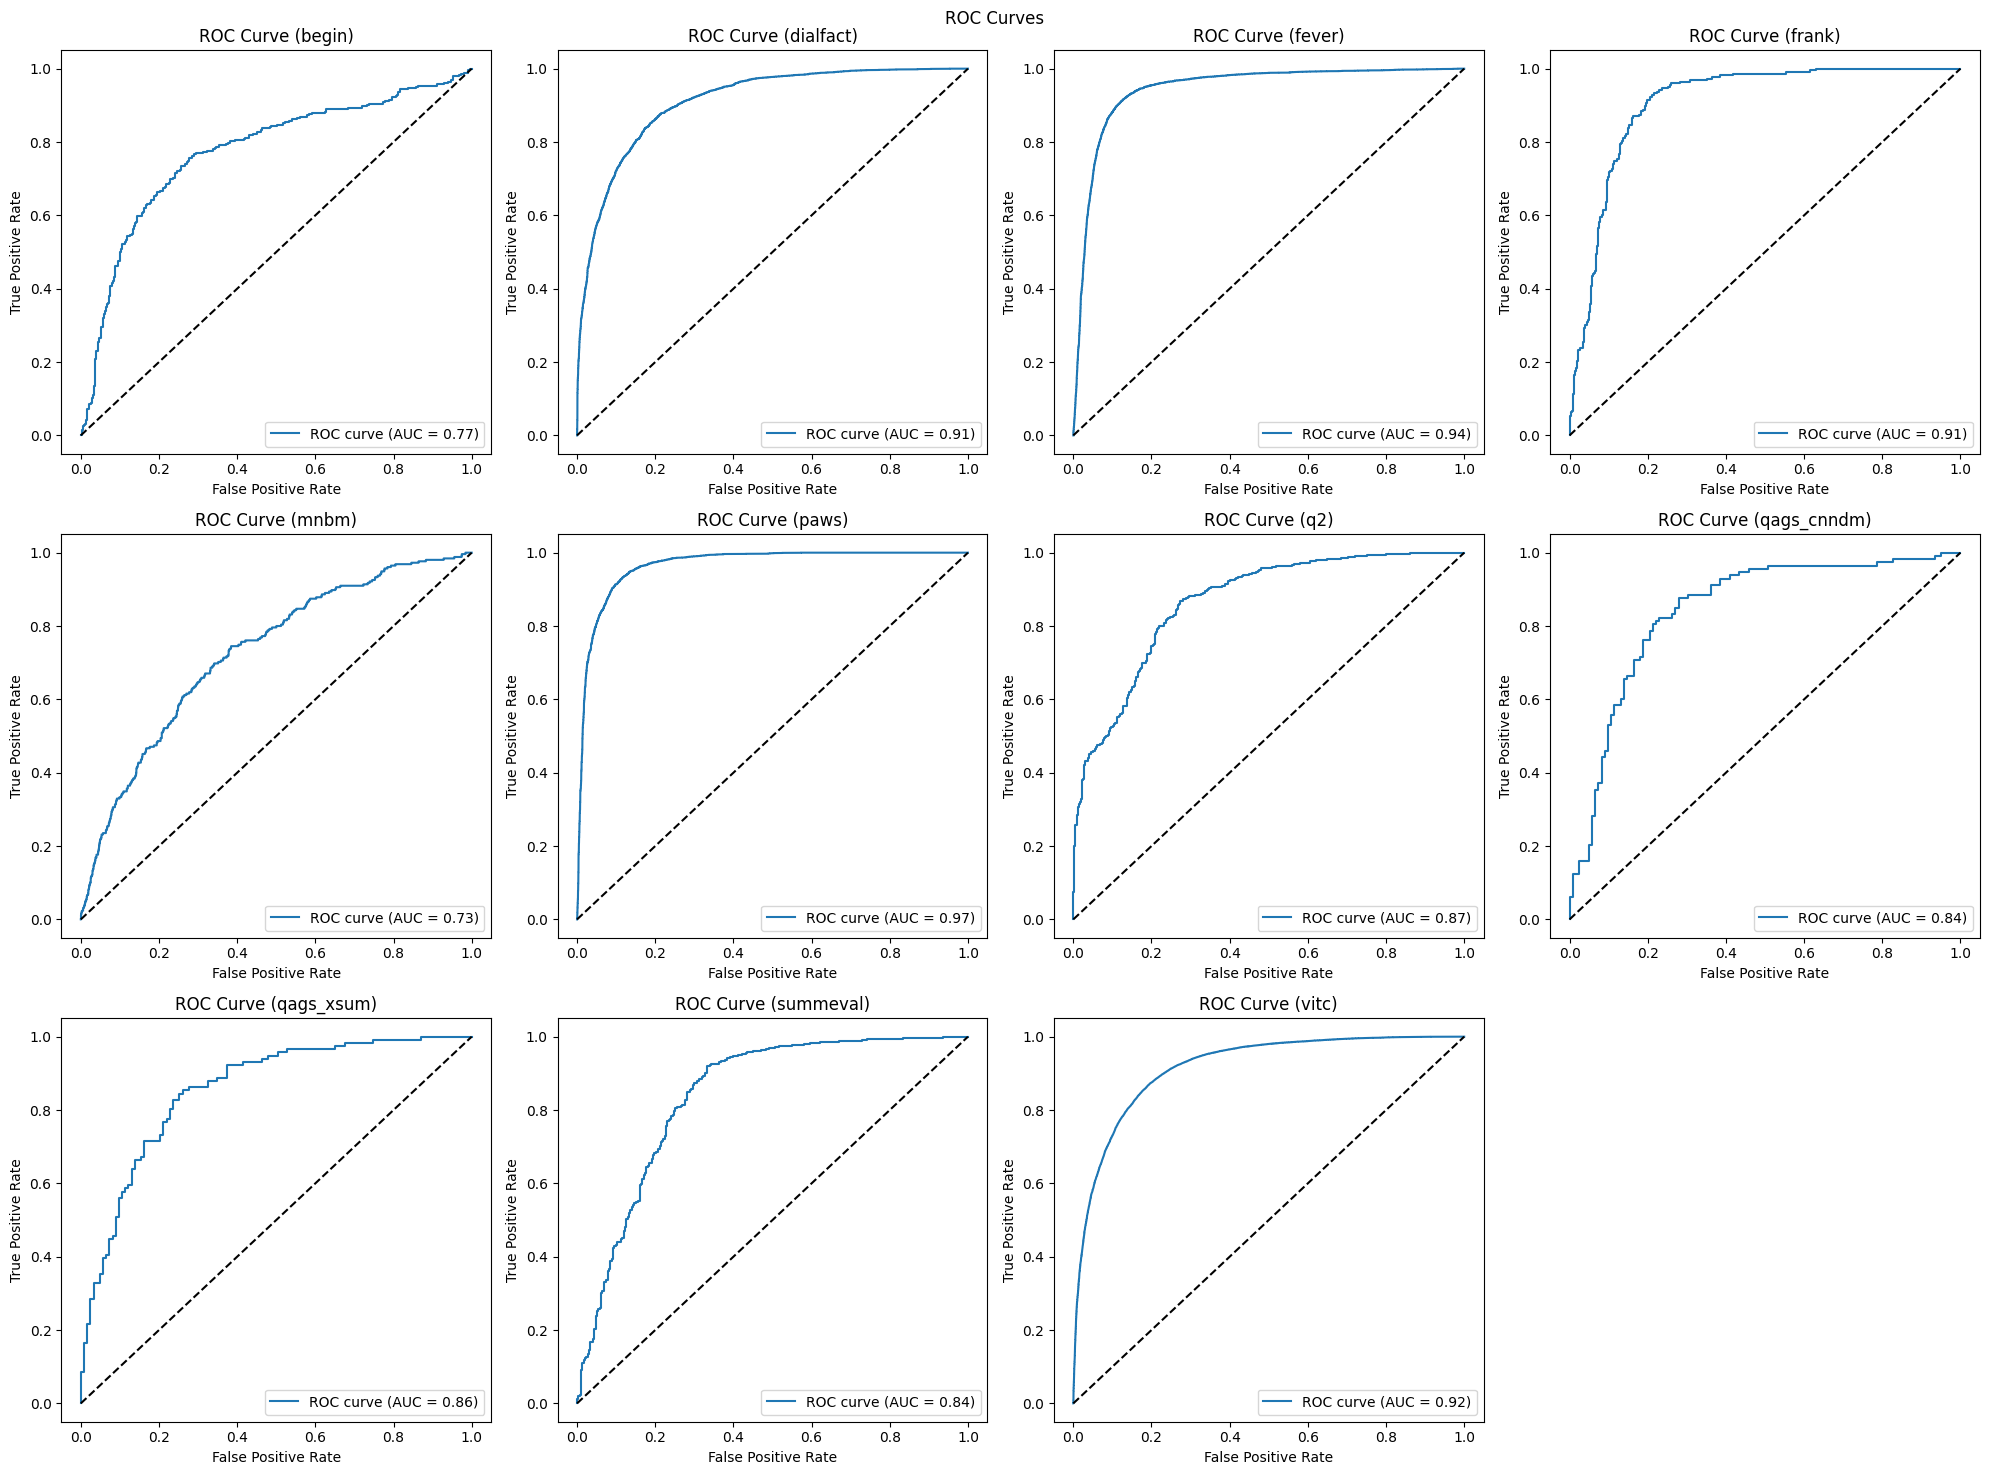

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

# データを読み込む
with open("/workspaces/scale-score/experiments/true/results/scale_xl_true_results.json", "r") as f:
    data = json.load(f)

# プロットを作成する関数
def create_roc_plot(ax, labels, predictions, title):
    # ROC曲線を計算
    fpr, tpr, _ = roc_curve(labels, predictions)
    auc_score = roc_auc_score(labels, predictions)

    # ROC曲線をプロット
    ax.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    ax.plot([0, 1], [0, 1], 'k--')  # ランダムな予測に対するROC曲線
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")

# プロットの数とレイアウト
num_plots = len(data.keys())
num_rows = 3
num_cols = 4

# プロットのサイズ
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# 各データに対してプロットを作成
for i, (k, v) in enumerate(data.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    labels = np.array(v[1])
    predictions = np.array(v[0])
    create_roc_plot(ax, labels, predictions, f'ROC Curve ({k})')

# 余分なサブプロットを非表示にする
for i in range(num_plots, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# タイトルを設定
plt.suptitle('ROC Curves')

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()
